## Machine learning assignment 2

###  The training and test R2 for the Lasso model with default parameters on the scikit-learn version of diabetes and the number of features used.

### Question 1

In [73]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
from itertools import compress
import pandas as pd
from sklearn.preprocessing import StandardScaler
diabetic_Data = sklearn.datasets.load_diabetes(return_X_y=False)

### Question 2 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(diabetic_Data['data'],diabetic_Data['target'], train_size = 0.7,  test_size = 0.3, random_state =1194)


### Question 3

In [75]:
lasso_1 = sklearn.linear_model.Lasso()
lasso_1.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
training_rsq1 = lasso_1.score(X_train,y_train)
print("The training rsq is")
print(training_rsq1)
test1_rsq1 = lasso_1.score(X_test,y_test)
print(" The testing rsq is")
print(test1_rsq1)

The training rsq is
0.355922215834
 The testing rsq is
0.325760438018


In [77]:
print("Coefficient values")
print(lasso_1.coef_)
t =(lasso_1.coef_!=0)
nz_coef = np.sum(lasso_1.coef_!=0)
print("Count of non zero features used by the model")
print(nz_coef)
#diabetic_Data.feature_names[(indices(lasso_1.coef == True).astype(int))]
list(compress((diabetic_Data['feature_names']), t))

Coefficient values
[   0.           -0.          385.75068422    0.            0.            0.
   -0.            0.          275.39667358    0.        ]
Count of non zero features used by the model
2


['bmi', 's5']

###  The training and test R2 for the Lasso model with default parameters on the original version of diabetes and the number of features used.

### Question 4,5,6 
## Note : Data was taken from local , file uploaded with assignment

In [78]:
db_data_original = pd.read_csv("D:\\Downloads\\diabetes.data" , delimiter = '\t')
X_train, X_test, y_train, y_test = train_test_split(db_data_original.loc[:, 'AGE':'S6'],db_data_original['Y'], train_size = 0.7,  test_size = 0.3, random_state =1194)
lasso_2_ns = sklearn.linear_model.Lasso()
lasso_2_ns.fit(X_train,y_train)
lasso_2_ns.get_params()
training_rsq2_ns = lasso_2_ns.score(X_train,y_train)
print("training rsq is")
print(training_rsq2_ns)
test1_rsq2_ns = lasso_2_ns.score(X_test,y_test)
print("testing rsq is")
print(test1_rsq2_ns)
print("Coefficient values")
print(lasso_2_ns.coef_)
t =(lasso_2_ns.coef_!=0)
nz_coef = np.sum(lasso_2_ns.coef_!=0)
print("Count of non zero features used by the model")
print(nz_coef)
list(compress((diabetic_Data['feature_names']), t))

training rsq is
0.513336904352
testing rsq is
0.480696748963
Coefficient values
[  0.18265278 -18.50977488   6.02196645   1.03828218   0.33538326
  -0.48876182  -1.41605417   1.32468838  22.8469203    0.37957936]
Count of non zero features used by the model
10


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Comments :
#### Number of features used by the model is higher when using original dataset.(Non zero features)
#### Training r_sq and testing r_sq is also higher for the original dataset

### Question 7 and 8

In [79]:
X_train, X_test, y_train, y_test = train_test_split(db_data_original.loc[:, 'AGE':'S6'],db_data_original['Y'], train_size = 0.7,  test_size = 0.3, random_state =1194)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)
lasso_2 = sklearn.linear_model.Lasso()
lasso_2.fit(X_train_scale,y_train)
lasso_2.get_params()
training_rsq2 = lasso_2.score(X_train_scale,y_train)
print("training rsq is")
print(training_rsq2)
test2_rsq2 = lasso_2.score(X_test_scale,y_test)
print("testing rsq is")
print(test2_rsq2)
print("Coefficient values")
print(lasso_2.coef_)
t_scaled =(lasso_2.coef_!=0)
nz_coef_scaled = np.sum(lasso_2.coef_!=0)
print("Count of non zero features used by the model")
print(nz_coef_scaled)
#diabetic_Data.feature_names[(indices(lasso_1.coef == True).astype(int))]
list(compress((diabetic_Data['feature_names']), t_scaled))

training rsq is
0.516404857178
testing rsq is
0.473797484443
Coefficient values
[  1.25891188  -9.72042598  25.18519869  13.53672564  -4.45066467  -0.
 -11.57330687   1.26991615  20.85481224   3.2474242 ]
Count of non zero features used by the model
9


['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']

## Comments :
#### training rq and testing rsq results are closer to results in item 6 and not item 3 , Number of non zero features = 9 (very close to item 6) ,Hence penalizing is very similar to item 6
#### Features are normalized but the Y is not 
#### Features are normalized differently between original and scikitlearn datasets 

#### Standard scaler uses z = (x - u) / s whereas the original data has been scaled differently. Thus dependinig on the input values the coefficients and impact of coefficients will be different which also results in a different alpha

### Question 9

In [124]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
alphas = np.arange(0.01,20,0.01)
no_of_parameters =[]
test_rsq_alpha = []
for alpha in alphas:
    lasso_diffalpha = sklearn.linear_model.Lasso(alpha = alpha)
    #print(alpha)
    lasso_diffalpha.fit(X_train_scale,y_train)
    training_rsq2_diffalpha = lasso_diffalpha.score(X_train_scale,y_train)
    #print(training_rsq2_diffalpha)
    test_rsq_alpha_toappend = lasso_diffalpha.score(X_test_scale,y_test)
    #print(test_rsq_alpha_toappend)
    test_rsq_alpha.append(test_rsq_alpha_toappend)
    #print(np.sum(lasso_diffalpha.coef_!=0))
    no_of_parameters.append(np.sum(lasso_diffalpha.coef_!=0))
    

Text(0,0.5,'Test R_Sq')

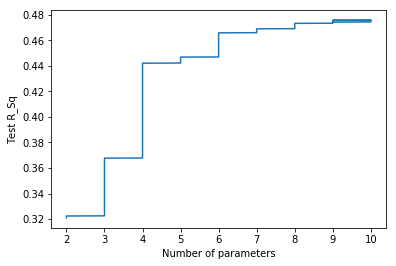

In [81]:
plt.plot(no_of_parameters,test_rsq_alpha)
plt.xlabel("Number of parameters")
plt.ylabel("Test R_Sq")

### Comments :
#### Y axis is test r_sq - I prefer Number of parameters = 8 ot 9 and test_rsq = 0.47...  since it has the better r_sq value(measure of fit) when compare to the other points. We notice that 
#### 1) After a certain alpha value , test r_sq decreases while fitting  9 to 10 parameters. 
#### 2)higher the alpha , lower parameters it fits , leading to a lower test rsq. 

### Question 10

In [82]:
from sklearn.model_selection import GridSearchCV
lasso_findreg= sklearn.linear_model.Lasso(max_iter=5000 , random_state =1194)
tuned_parameters = [{'alpha': alphas}]
find_reg = GridSearchCV(lasso_findreg, tuned_parameters, cv=10)
find_reg.fit(X_train_scale,y_train)
print("Regularization parameter alpha")
print(find_reg.best_estimator_.alpha)

Regularization parameter alpha
0.27


In [83]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10,alphas = alphas, random_state=1194).fit(X_train_scale, y_train)
tr_r2 = reg.score(X_train_scale, y_train)
print("Training s_sq is")
print(tr_r2)
test_r2 = reg.score(X_test_scale,y_test)
print("Test R_Sq is")
print(test_r2)
print("Alpha value")
print(reg.alpha_)
print("Coef values")
print(reg.coef_)
print("Number of parameters used")
print(np.sum(reg.coef_!=0))

Training s_sq is
0.518745148666
Test R_Sq is
0.474267279142
Alpha value
0.27
Coef values
[  1.95620987 -11.14669232  25.42122104  14.22124087  -9.09919206   0.
  -8.13594849   6.58240594  21.46020592   3.72295986]
Number of parameters used
9


### Question 11 : Implementation of inductive conformal predictor

In [134]:
X_train_scale_tosplit = pd.DataFrame(X_train_scale)
X_test_scale_tosplit = pd.DataFrame(X_test_scale)
X_train_calib = pd.DataFrame()
y_train_calib =pd.DataFrame()
X_train_trainingproper, X_train_calib,y_trainingproper,y_train_calib= train_test_split(X_train_scale_tosplit,y_train ,train_size = 0.68, random_state =1294)
scaler = StandardScaler()
scaler.fit(X_train_trainingproper)
scaled_X_train_trainingproper = scaler.transform(X_train_trainingproper)
scaled_X_train_calib = scaler.transform(X_train_calib)
scaled_X_test = scaler.transform(X_test_scale_tosplit)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [135]:
#Fit the Lasso to the training set proper.
y_calib_pred = lasso_ip.predict(scaled_X_train_calib)
y_calib_pred= pd.DataFrame(y_calib_pred)
y_test_pred_2 = lasso_ip.predict(scaled_X_test)
y_test_pred_2= pd.DataFrame(y_test_pred_2)
alpha_i = abs(y_train_calib - y_calib_pred)
#Compute the alphai for the calibration set by the formula alpha = y(truelabel) - y(predicted by lasso)
#being the true label and ^yi being the Lasso prediction)
sorted_alpha = sorted(alpha_i)
y_train_calib =pd.DataFrame(y_train_calib)

In [146]:

e = 0.05
e_2 = 0.2
nrow = np.shape(sorted_alpha)
m = nrow[0]
k =np.float_([(1-e)*(m+1)])
k2 = np.float_([(1-e_2)*(m+1)])
k = int(k)
k2 = int(k2)
c= sorted_alpha[k]
c2 =sorted_alpha[k2]
y_test_pred_2['lower_lim_set_sig_5%'] = pd.Series( y_test_pred_2[0] - c, index=y_calib_pred.index)
y_test_pred_2['upper_lim_set_sig_5%'] = pd.Series( y_test_pred_2[0] + c, index=y_calib_pred.index)
y_test_pred_2['lower_lim_set_sig_20%'] = pd.Series( y_test_pred_2[0] - c2, index=y_calib_pred.index)
y_test_pred_2['upper_lim_set_sig_20%'] = pd.Series( y_test_pred_2[0] + c2, index=y_calib_pred.index)
y_train_calib.reset_index(inplace=True)
m

100

In [ ]:
y_test =pd.DataFrame(y_test)
y_test_pred_2['true_label'] = pd.Series(y_test['Y'], index = y_calib_pred.index )
y_calib_pred['test_score_sig_5%'] = np.where((y_test_pred_2['lower_lim_set_sig_5%']<= y_test_pred_2['true_label']) & (y_test_pred_2['upper_lim_set_sig_5%']>= y_test_pred_2['true_label']), 1, 0)
y_calib_pred['test_score_sig_20%'] = np.where((y_test_pred_2['lower_lim_set_sig_20%']<= y_test_pred_2['true_label']) & (y_test_pred_2['upper_lim_set_sig_20%']>= y_test_pred_2['true_label']), 1, 0)

count_0_sig5 = (y_test_pred_2['test_score_sig_5%'] == 0).sum()
count_0_sig20 = (y_test_pred_2['test_score_sig_20%'] == 0).sum()
test_error_conf_pred_sig5 = count_0_sig5/m
test_error_conf_pred_sig20 = count_0_sig20/m

### The lengths of prediction intervals and their test error rates at signifcance levels 5% and 20% (if you are implementing an inductive conformal predictor).

### Note :All prediction intervals for test samples is present in the table

In [144]:
y_test_pred_2
# 0 is predicted label


,0,lower_lim_set_sig_5%,upper_lim_set_sig_5%,lower_lim_set_sig_20%,upper_lim_set_sig_20%,true_label
0,141.857993,-282.142007,565.857993,-226.142007,509.857993,151.0
1,160.794818,-263.205182,584.794818,-207.205182,528.794818,75.0
2,160.026839,-263.973161,584.026839,-207.973161,528.026839,141.0
3,184.380423,-239.619577,608.380423,-183.619577,552.380423,NaN
4,147.362692,-276.637308,571.362692,-220.637308,515.362692,NaN
5,154.236193,-269.763807,578.236193,-213.763807,522.236193,NaN
6,149.297739,-274.702261,573.297739,-218.702261,517.297739,138.0
7,182.900183,-241.099817,606.900183,-185.099817,550.900183,NaN
8,165.991866,-258.008134,589.991866,-202.008134,533.991866,NaN
9,119.126067,-304.873933,543.126067,-248.873933,487.126067,NaN


### Test error rates

In [145]:
print("Error rate for significance at 5%")
print(test_error_conf_pred_sig5)
print("Error rate for significance at 20%")
print(test_error_conf_pred_sig20)


Error rate for significance at 5%
0.0
Error rate for significance at 20%
0.0
